In [2]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso

In [25]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

In [26]:
# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [33]:
#Next, we can iterate the lambda values ranged from 0 to 199. 
#Note that the coefficients at lambda equal to zero (x = 0) are the same with the OLS coefficients.
# initialize
Lasso_reg = Lasso(alpha=0.01)
Lasso_reg.fit(X_train, y_train)
Lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': Lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

In [34]:
# iterate lambdas
for alpha in np.arange(1, 5, 1):
    # training
    print("alpha is " +str(alpha) )
    Lasso_reg = Lasso(alpha=alpha)
    Lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    Lasso_df[var_name] = Lasso_reg.coef_
    # prediction
    lasso_train_pred.append(Lasso_reg.predict(X_train))
    lasso_test_pred.append(Lasso_reg.predict(X_test))


alpha is 1
alpha is 2
alpha is 3
alpha is 4


In [35]:
# organize dataframe
Lasso_df = Lasso_df.set_index("variable").T.rename_axis("estimate")

In [36]:
Lasso_df.rename_axis(None).reset_index()

variable,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-1.28777,1.475808,-0.168792,0.408832,-1.706219,2.377087,0.269956,-3.196741,2.489278,-1.945664,-1.738576,1.174297,-3.872117
1,estimate1,-0.00000,0.000000,-0.000000,0.000000,-0.000000,2.400912,-0.000000,-0.000000,-0.000000,-0.000000,-1.211545,0.509956,-3.622801
2,estimate2,-0.00000,0.000000,-0.000000,0.000000,-0.000000,1.665467,-0.000000,0.000000,-0.000000,-0.000000,-0.615034,0.000000,-3.414122
3,estimate3,-0.00000,0.000000,-0.000000,0.000000,-0.000000,1.061939,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-2.960464
4,estimate4,-0.00000,0.000000,-0.000000,0.000000,-0.000000,0.329770,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-2.346968


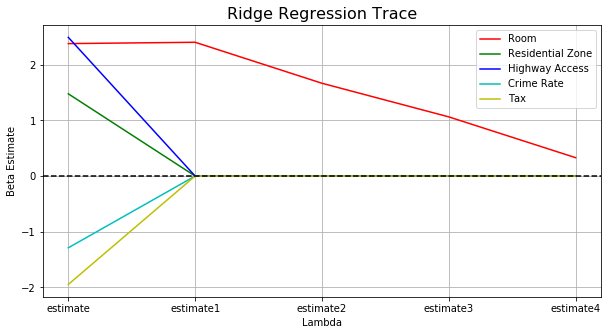

In [37]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(Lasso_df.RM, 'r', Lasso_df.ZN, 'g', Lasso_df.RAD, 'b', Lasso_df.CRIM, 'c', Lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)